**DATA UNDERSTANDING**

The tensorflow malaria dataset contains 27558 Images of classes "Parasitized" and "Uninfected"

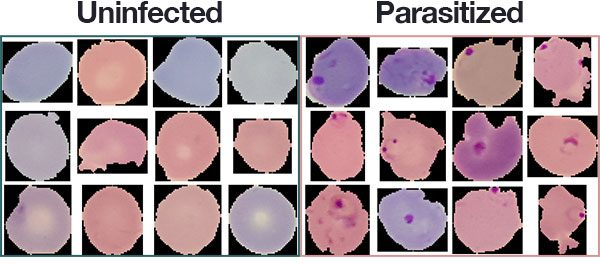

The aim of this project is to build a model using CNN as feature extractors toward improved parasite detection in thin blood smear images, to label them as "Parasitize" or "Uninfected."

**DATA PREPARATION**

The Dataset is available at Tensorflow official website, Here we download the data and first push it to our working repository.

In [31]:
#install tensorflow gpu
!pip install tensorflow

In [32]:
# Check the version
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)

2.15.0


In [33]:
# import other libraries
import numpy as np
import matplotlib.pyplot as plt


In [34]:
# Cloning the project folder from my github
!git clone https://github.com/NashonOkumu/malaria-classification.git

fatal: destination path 'malaria-classification' already exists and is not an empty directory.


In [35]:
# Define Image size
img_width= 65
img_height = 65

In [36]:
# Call Image Data generator and Splitting the dataset
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [37]:
# Read training set
train_data_generator = datagen.flow_from_directory(directory='/content/malaria-classification/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'training'
                                                   )

Found 22048 images belonging to 2 classes.


In [38]:
# Read validation set
validation_data_generator = datagen.flow_from_directory(directory='/content/malaria-classification/cell_images',
                                                   target_size = (img_width, img_height),
                                                   class_mode = 'binary',
                                                   batch_size = 16,
                                                   subset = 'validation'
                                                   )

Found 5510 images belonging to 2 classes.


In [39]:
# See labels
train_data_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

**MODEL BUILDING**

Now, we build the CNN model

In [40]:
model = Sequential()

model.add(Conv2D(16, (3,3), input_shape = (img_width, img_height, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))


In [41]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 63, 63, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 31, 31, 16)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 31, 31, 16)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 14, 14, 32)       

**COMPILING THE MODEL**

In [42]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [43]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch = len(train_data_generator),
                              epochs = 5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator))

<ipython-input-43-3b4649eb4549>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


Epoch 1/5
1378/1378 [==============================] - 120s 86ms/step - loss: 0.5062 - accuracy: 0.7466 - val_loss: 0.2123 - val_accuracy: 0.9296
Epoch 2/5
1378/1378 [==============================] - 101s 73ms/step - loss: 0.2257 - accuracy: 0.9215 - val_loss: 0.2117 - val_accuracy: 0.9120
Epoch 3/5
1378/1378 [==============================] - 101s 73ms/step - loss: 0.1999 - accuracy: 0.9305 - val_loss: 0.1887 - val_accuracy: 0.9352
Epoch 4/5
1378/1378 [==============================] - 105s 76ms/step - loss: 0.1794 - accuracy: 0.9360 - val_loss: 0.1734 - val_accuracy: 0.9450
Epoch 5/5
1378/1378 [==============================] - 101s 73ms/step - loss: 0.1705 - accuracy: 0.9445 - val_loss: 0.1748 - val_accuracy: 0.9430


In [44]:
history.history

{'loss': [0.5062147378921509,
  0.22567877173423767,
  0.19987355172634125,
  0.1793631762266159,
  0.1704815775156021],
 'accuracy': [0.7465983033180237,
  0.9214894771575928,
  0.9304698705673218,
  0.9359579086303711,
  0.9445301294326782],
 'val_loss': [0.2123088538646698,
  0.21174944937229156,
  0.1887456774711609,
  0.17341886460781097,
  0.1748015284538269],
 'val_accuracy': [0.9295825958251953,
  0.9119782447814941,
  0.9352087378501892,
  0.9450090527534485,
  0.9430127143859863]}

In [45]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

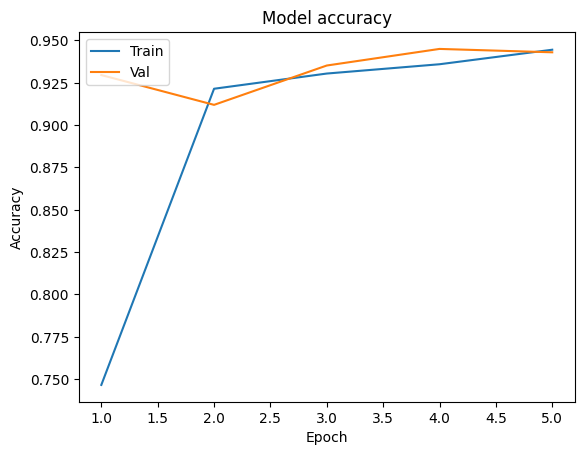

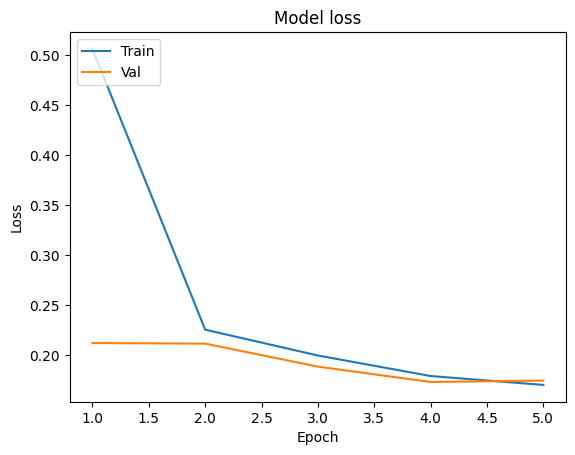

In [46]:
plot_learningCurve(history, 5)

**CONCLUSION**

The model achieved progressively lower training loss and higher training accuracy over five epochs, indicating effective learning from the training data. Additionally, consistent improvement in validation accuracy alongside stable validation loss suggests the model's ability to generalize well to unseen data.